<a href="https://colab.research.google.com/github/jinwoo3239/rdkit/blob/main/RDKIT_tutorial_rev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rdkit Tutorial (practice)
- laidd 강좌 (강원대 이주훈 교수 강의를 참고하였음. <https://laidd.org/my/lesson/course/111>



## introduction
- rdkit 설치
- 파일 일기

### Rdkit install
- DeepChem

In [2]:
# rdkit install
!pip install DeepChem

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 608 kB 4.3 MB/s 
     |████████████████████████████████| 36.8 MB 35 kB/s 


### Rdkit module


In [59]:
# rdkit version

import rdkit
from rdkit import Chem
from rdkit.Chem import Draw, AllChem
from rdkit.Chem.Draw import IPythonConsole, rdMolDraw2D

from rdkit import DataStructs
from rdkit.Chem import Descriptors, rdMolDescriptors

from rdkit.Chem.AllChem import Compute2DCoords, EmbedMolecule


# Fingerprints
from rdkit.Chem import RDKFingerprint, MACCSkeys
from rdkit.Chem.AllChem import GetMorganFingerprint, GetMorganFingerprintAsBitVect
from rdkit.Chem.rdMolDescriptors import GetMACCSKeysFingerprint ,GetMorganFingerprint, GetMorganFingerprintAsBitVect


# Similarity
from rdkit import DataStructs
from rdkit.DataStructs import FingerprintSimilarity, DiceSimilarity



## 참고
from rdkit.Chem import AddHs, RemoveHs
from rdkit.Chem.AllChem import GenerateDepictionMatching2DStructure # 정렬




# mol.HasSubstructMatch (공통된 분자식 확인)
# mol.GetSubstructMatch(patt)

# mol.GetProp('_Name')
# mol.SetProp("_Name", 'test_name')
# mol.SetProp("LogP", f'logP : {logp:.3f}')
# mol.GetProp("LogP") # legends...


IPythonConsole.molSize = 150, 150

In [27]:
print(rdkit.__version__)

2022.03.5


### Basic 화학식 및 파일들 입출력  
- 기본적으로 rdkit 은 mol 파일을 이용한다
- 분자를 표현하는 방법은 대표적은로 Smiles
- 파일은 mol, sdf
- mol.SetProp -> mol.GetProp

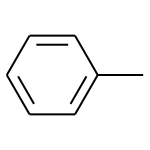

In [ ]:
#Smiles > Mol

m = Chem.MolFromSmiles('Cc1ccccc1')
m

In [ ]:
# Mol > Smiles

print(Chem.MolToSmiles(m)) # To caconical smiles
print(Chem.MolToSmiles(m, kekuleSmiles=True))

Cc1ccccc1
CC1=CC=CC=C1


In [33]:
# smiles > mol > caconical smiles

mol1 = Chem.MolToSmiles(Chem.MolFromSmiles('C1=CC=CN=C1'))
mol2 = Chem.MolToSmiles(Chem.MolFromSmiles('c1cccnc1'))
mol3 = Chem.MolToSmiles(Chem.MolFromSmiles('c1cccnc1'))

print(mol1)
print(mol2)
print(mol3)

c1ccncc1
c1ccncc1
c1ccncc1


In [ ]:
!wget https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/input.mol

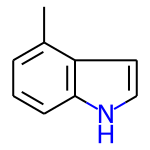

In [41]:
# mol file > mol

m = Chem.MolFromMolFile('input.mol')
m

In [ ]:
!wget https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/5ht3ligs.sdf

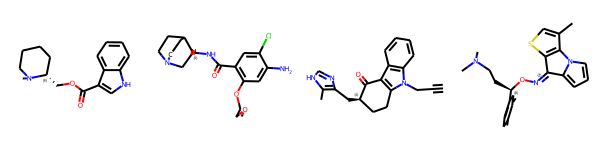

In [43]:
# sdf file > mol
# sdf file - $$$$ 이 구분자로, 여러개의 mol 분자들이 있음

suppl = Chem.SDMolSupplier('5ht3ligs.sdf')
mols = [mol for mol in suppl if mol is not None]

Draw.MolsToGridImage(mols, molsPerRow=4, subImgSize=(150, 150))

In [ ]:
# gz file
import gzip
!wget https://github.com/rdkit/rdkit/raw/master/Docs/Book/data/actives_5ht3.sdf.gz

/usr/local/lib/python3.7/dist-packages/rdkit/Chem/Draw/IPythonConsole.py:254: UserWarning: Truncating the list of molecules to be displayed to 4. Change the maxMols value to display more.
  % (maxMols))


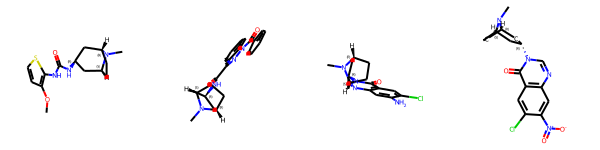

In [38]:
fp = gzip.open('actives_5ht3.sdf.gz')
suppl = Chem.ForwardSDMolSupplier(fp)
mols = [mol for mol in suppl if mol is not None]

Chem.Draw.MolsToGridImage(mols, maxMols=4, molsPerRow=4, subImgSize=(150, 150))

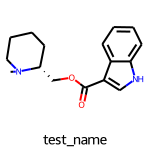

In [45]:
# Set proproties

mol = mols[0]
mol.SetProp("_Name", 'test_name')
# print(Chem.MolToMolBlock(m_test))

Chem.Draw.MolToImage(mol, size=(150, 150), legend=mol.GetProp('_Name'))

### Export to file & Save
- Chem.MolToFile
- Chem.SDWriter

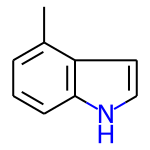

In [ ]:
# Export

Chem.MolToMolFile(m, "test.mol")
Chem.MolFromMolFile('test.mol')

In [46]:
# file 로 저장하기

with Chem.SDWriter('test_mols.sdf') as fout:
    for mol in mols:
        fout.write(mol)

## 구조 만들기

1.   Eembedding...?
2.   항목 추가



### mol에 수소 붙이고 제거하기

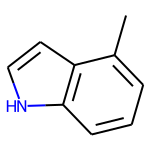

In [47]:
mol = Chem.MolFromSmiles('Cc1cccc2[nH]ccc12')
mol

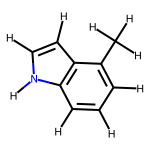

In [51]:
# MolToMolBlock 으로 수소의 위치를 확인 할 수 있음
mol_H = Chem.AddHs(mol) # 보통 수소의 좌표는 입력되지 않음 (Chem.MolToMolBlock 으로 확인 가능)
mol_H

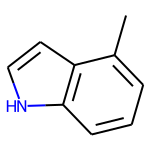

In [49]:
mol_H_removeH = Chem.RemoveHs(mol_H)
mol_H_removeH

### 3차원 구조 만들기
- 분자의 3차원 구조 만들기
- 분자의 3차원 crystal 구조를 만드는 것은 매우 어려움
- 아주 정확한 3차원 구조를 얻기 위해서는 양자 계산 및 전역 최적화 (Global optimization)
- 회전 가능한 bond 의 수가 많은 수록 기하 급수적으로 늘어나게 됨...
- 3차원 구조를 만들어주는 알고리즘은, 어느 정도의 가정하고 만들게 됨... (정확하지 않음)

- RDkit 에서는 ETKDG

- AllChem.EmbedMolecule
- 입력 받은 변수를 inplace 변화를 일으킴

In [ ]:
# 3차원 구조로 만들기

AllChem.EmbedMolecule(mol_H) # 문제 없으면 0 을 return

0

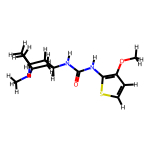

In [ ]:
mol_H # MolToMolBlock 을 해보면 수소의 좌표가 입력되어 있는 것을 확인할 수 있음

In [ ]:
print(Chem.MolToMolBlock(mol_H))

### 2차원 coordination

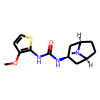

In [ ]:
# 2d cordinate
# rdkit.Chem.AllChem.EmbedMolecule(mol) 실행 후에 실행 할 수 있음

AllChem.Compute2DCoords(mols[0])
Draw.MolToImage(mols[0], size=(100, 100))

## Fingerprint
- rdkit.RDKFinfgerprint(mol)
    - explain
- MACCSKeys
    - 166 public keys
- Morgan Fingerprints
    - 다른 말로 ECFP, radius 를 확인해봐야함 (1 - ECFP2), (2 - ECFP4)

In [ ]:
!wget https://github.com/rdkit/rdkit/raw/master/Docs/Book/data/actives_5ht3.sdf.gz

import gzip
fp = gzip.open('actives_5ht3.sdf.gz')
suppl = Chem.ForwardSDMolSupplier(fp)

mols = [mol for mol in suppl if mol is not None]

### Fingerprint_fun

In [ ]:
# Fingerprint using RDKits

ms = [Chem.MolFromSmiles('CCOC'), Chem.MolFromSmiles('CCO'), Chem.MolFromSmiles('COC')]

fps = [Chem.RDKFingerprint(mol) for mol in ms]
fps

In [ ]:
# MACCSKeys - 166 public keys

from rdkit.Chem import MACCSkeys

fps = [MACCSkeys.GenMACCSKeys(mol) for mol in ms]
fps

In [ ]:
# Morgan FingerPrints, 다른 말로 ECFP
# radius 를 확인해봐야함 1 - ECFP2, 2 - ECFP4

from rdkit.Chem import AllChem

fps = [AllChem.GetMorganFingerprint(mol, 2) for mol in ms]
fps

In [ ]:
# 정수 list 가 아니라 bit vector 로 변환하여 보통 사용

fps = [AllChem.GetMorganFingerprintAsBitVect(mol, 2) for mol in ms]
fps

### Smiliarity
- 특정 분자와 매우 유사한 것들만 고르겠다... 이런 것에 이용 한다

In [ ]:
# Similarity

from rdkit import DataStructs

ms = [Chem.MolFromSmiles('CCOC'), Chem.MolFromSmiles('CCO'), Chem.MolFromSmiles('COC')]
fps = [Chem.RDKFingerprint(mol) for mol in ms]

DataStructs.FingerprintSimilarity(fps[0], fps[1]) # Taminoto smiliary

0.6

In [ ]:
DataStructs.FingerprintSimilarity(fps[0], fps[1], metric=DataStructs.DiceSimilarity)

0.75

In [ ]:
DataStructs.FingerprintSimilarity(fps[0], fps[1], )

#### Similarity map

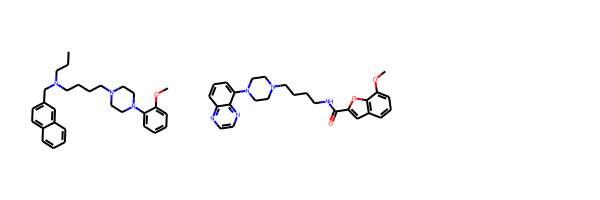

In [60]:
# Similarity map

mol = Chem.MolFromSmiles('COc1cccc2cc(C(=O)NCCCCN3CCN(c4cccc5nccnc54)CC3)oc21')
refmol = Chem.MolFromSmiles('CCCN(CCCCN1CCN(c2ccccc2OC)CC1)Cc1ccc2ccccc2c1')

Draw.MolsToGridImage([refmol, mol])

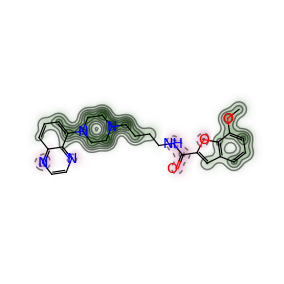

In [65]:
from rdkit.Chem.Draw import SimilarityMaps

fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(refmol, mol,
                                                               SimilarityMaps.GetMorganFingerprint,
                                                               size=(150, 150))

# _, maxWeight = SimilarityMaps.GetSimilarityMapForFingerprint(refmol, mol, 
#                                         lambda m, i: SimilarityMaps.GetMorganFingerprint(m, i, radius=2)) 

### 다른 구조를 뽑아내는 방법

In [ ]:
# 최대한 다른 10 개의 다른 구조를 뽑는 방법

!wget https://github.com/rdkit/rdkit/raw/master/Docs/Book/data/actives_5ht3.sdf.gz

import gzip
fp = gzip.open('actives_5ht3.sdf.gz')
suppl = Chem.ForwardSDMolSupplier(fp)

mols = [mol for mol in suppl if mol is not None]

In [68]:
# 180 개 에서 최대한 다른 10개의 분자를 뽑아 내는 방법

from rdkit.Chem.rdMolDescriptors import GetMorganFingerprint
from rdkit.SimDivFilters.rdSimDivPickers import MaxMinPicker

fps = [GetMorganFingerprint(mol, 3) for mol in mols]

# define the disfunc
def dist_fun(i, j, fps=fps):
    return 1 - DataStructs.DiceSimilarity(fps[i], fps[j])

picker = MaxMinPicker()
pickIndices = picker.LazyPick(dist_fun, len(fps), 10, seed=100)
pickIndices

In [69]:
pick_list = sorted(list(pickIndices))
pick_list

[6, 12, 41, 57, 97, 99, 130, 137, 151, 158]

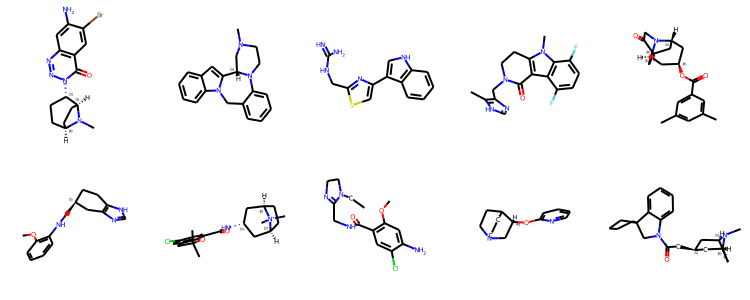

In [70]:
pick_mol = [mols[i] for i in pick_list]

Draw.MolsToGridImage(pick_mol, molsPerRow=5, subImgSize=(150, 150))

## Description

- Descriptor calculation

- 두 군데의 submodule 안에 들어 있음
- rdkit.Chem.Descriptors, rdMolDescriptors
- rdMolDescriptors 안에 더 많은 함수가 들어 있음

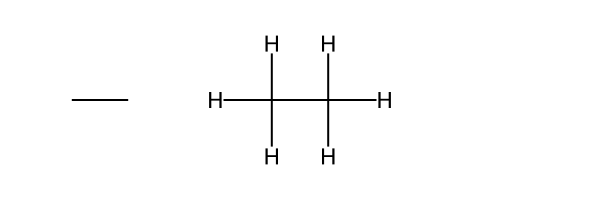

In [29]:
from rdkit.Chem import Descriptors, rdMolDescriptors

mol_nH = Chem.MolFromSmiles('CC')
mol_H = Chem.AddHs(mol_nH)

Draw.MolsToGridImage([mol_nH, mol_H])

In [30]:
print(Descriptors.MolWt(mol_nH))
print(Descriptors.MolWt(mol_H))

print(Descriptors.ExactMolWt(mol_nH))
print(Descriptors.ExactMolWt(mol_H))

print(rdMolDescriptors.CalcExactMolWt(mol_nH))
print(rdMolDescriptors.CalcExactMolWt(mol_H))

30.07
30.069999999999993
30.046950192
30.046950191999997
30.046950192
30.046950191999997


In [71]:
# QED 얼마나 기존의 약과 유사한 물성을 가지는가 8가지의 특성
# https://www.nature.com/articles/nchem.1243
# 0 ~ 1 사이로 나타남, 0은 상당히 약과 다름... 1에 가까우면 기존의 알려진 약과 유사한 물성을 가짐

Descriptors.qed(mol_nH)

0.3727855551576051

## Substructure 

### 공통된 구조 찾고 정렬

In [ ]:
!wget https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/cdk2.sdf

In [73]:
suppl = Chem.SDMolSupplier('cdk2.sdf')
mols = [mol for mol in suppl if mol is not None]

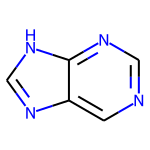

In [77]:
# 공통된 구조를 이용하여 정렬하기

p = Chem.MolFromSmiles('[nH]1cnc2cncnc21')
AllChem.Compute2DCoords(p)

p

In [78]:
# 특정 core 구조를 가지는 분자만 선택

subms = [mol for mol in mols if mol.HasSubstructMatch(p)]
subms

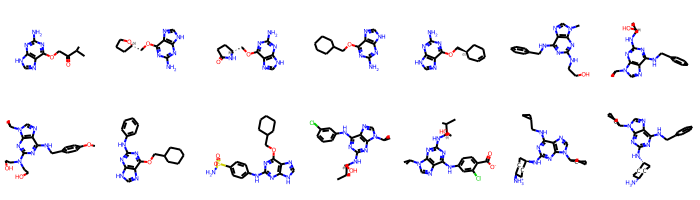

In [79]:
Chem.Draw.MolsToGridImage(subms, molsPerRow=7, subImgSize=(100, 100))

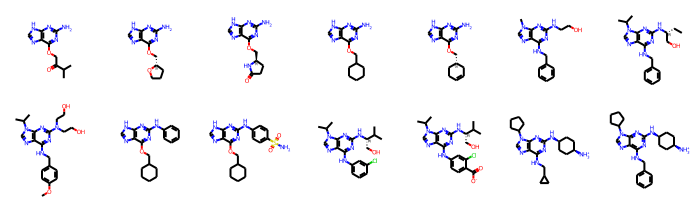

In [80]:
for mol in subms:
    _ = AllChem.GenerateDepictionMatching2DStructure(mol, p)

Chem.Draw.MolsToGridImage(subms, molsPerRow=7, subImgSize=(100, 100))

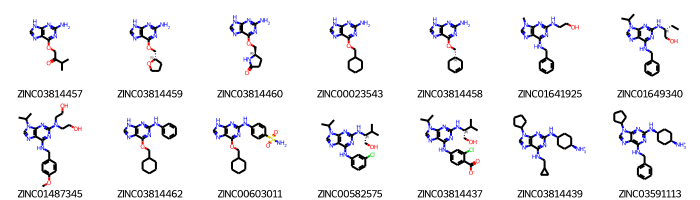

In [81]:
img = Draw.MolsToGridImage(subms, molsPerRow=7, subImgSize=(100, 100),
                           legends=[mol.GetProp('_Name') for mol in subms])

img

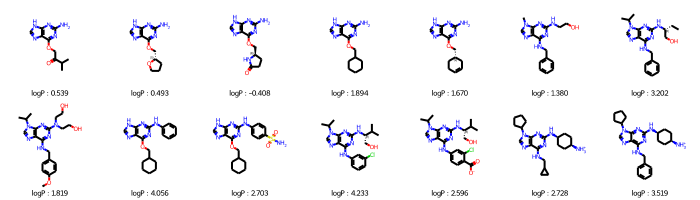

In [82]:
# 밑에 다르게 표기하고 싶을 때...

for mol in subms:
    logp = Chem.Descriptors.MolLogP(mol)
    mol.SetProp("LogP", f'logP : {logp:.3f}') # property 를 넣을 때에는 string 으로 넣어야 한다

img = Chem.Draw.MolsToGridImage(subms, molsPerRow=7, subImgSize=(100, 100),
                                legends=[mol.GetProp('LogP') for mol in subms])
img

### 특정 구조에 highlight 추가


In [83]:
# 특정 구조에 highlight 주기

smi = 'c1cc(F)ccc1Cl'
mol = Chem.MolFromSmiles(smi)
patt = Chem.MolFromSmarts('ClccccF')

mol.GetSubstructMatch(patt)

(7, 6, 5, 4, 2, 3)

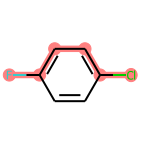

In [84]:
mol

In [87]:
# atom

hit_ats_idx = list(mol.GetSubstructMatch(patt))

# bond 를 찾는 법

hit_bonds_idx = []

for bond in patt.GetBonds():
    aid1 = hit_ats_idx[bond.GetBeginAtomIdx()]
    aid2 = hit_ats_idx[bond.GetEndAtomIdx()]
    hit_bonds_idx.append(mol.GetBondBetweenAtoms(aid1, aid2).GetIdx())

print(hit_ats_idx)
print(hit_bonds_idx)

[7, 6, 5, 4, 2, 3]
[6, 5, 4, 3, 2]


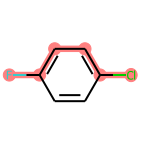

In [90]:
Chem.Draw.MolToImage(mol, highlightAtoms=hit_ats_idx, highlightBonds=hit_bonds_idx, size=(150, 150))

In [89]:
from rdkit.Chem.Draw import rdMolDraw2D

d = rdMolDraw2D.MolDraw2DSVG(500, 500) # svg 로 저장하겠다
rdMolDraw2D.PrepareAndDrawMolecule(d, mol, highlightAtoms=hit_ats_idx, highlightBonds=hit_bonds_idx)
d.FinishDrawing()

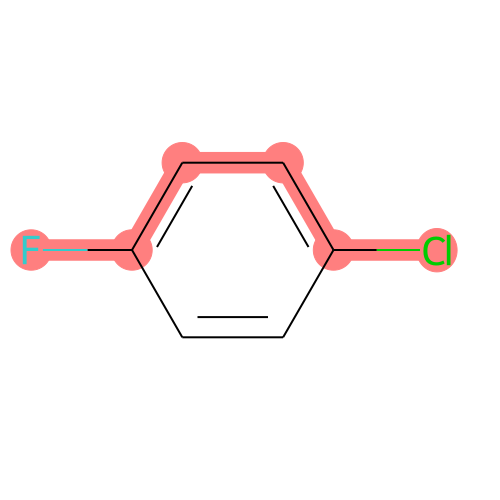

In [48]:


from IPython.display import SVG

SVG(d.GetDrawingText())

In [49]:
# save

# save
with open('a.svg', 'w') as fp:
    fp.write(d.GetDrawingText())

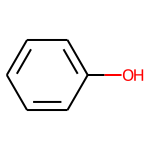

In [73]:
# Substructure searching

m = Chem.MolFromSmiles('c1ccccc1O')
m

In [76]:
patt = Chem.MolFromSmarts('ccO')
m.HasSubstructMatch(patt)

True

In [78]:
m.GetSubstructMatch(patt)

(0, 5, 6)

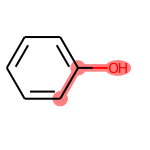

In [79]:
m

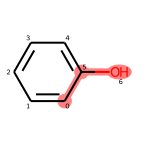

In [83]:
# pattern 에 해당하는 atom 을 확인해보자

for atom in m.GetAtoms():
    i = atom.GetIdx()
    atom.SetProp('atomNote', str(i))

m

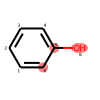

In [84]:
hit_atoms = m.GetSubstructMatch(patt)

Chem.Draw.MolToImage(m, size=(100, 100), highlightAtoms=hit_atoms)

In [85]:
!wget https://github.com/rdkit/rdkit/raw/master/Docs/Book/data/actives_5ht3.sdf.gz

patt = Chem.MolFromSmarts('c[NH1]') # aromatic carbon 에 수소 하나 붙은 것
matches = []

# fp = Chem.SDMolSupplier('actives_5ht3.sdf')
import gzip

fp = gzip.open('actives_5ht3.sdf.gz')
suppl = Chem.ForwardSDMolSupplier(fp)
mols = [mol for mol in suppl if mol is not None]

for mol in mols:
    if mol.HasSubstructMatch(patt):
        matches.append(mol)
        
print(len(matches))

--2022-08-12 04:56:10--  https://github.com/rdkit/rdkit/raw/master/Docs/Book/data/actives_5ht3.sdf.gz
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/actives_5ht3.sdf.gz [following]
--2022-08-12 04:56:10--  https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/actives_5ht3.sdf.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36077 (35K) [application/octet-stream]
Saving to: ‘actives_5ht3.sdf.gz.4’

actives_5ht3.sdf.gz 100%[===================>]  35.23K  --.-KB/s    in 0.003s  

2022-08-12 04:56:10 (10.4 MB/s) - ‘actives_5ht3.sdf.gz.4’ saved [3607

In [87]:
mol = Chem.MolFromSmiles('c1ccccc1OC')

print(mol.HasSubstructMatch(Chem.MolFromSmiles('COC')))
print(mol.HasSubstructMatch(Chem.MolFromSmarts('COC')))
print(mol.HasSubstructMatch(Chem.MolFromSmarts('cOC')))

True
False
True


### Chirality

In [91]:
# 일반적으로 substructrue에서는 chiraity 를 고려하지 않는다

import rdkit
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem

m = Chem.MolFromSmiles('CC[C@H](F)Cl')

m.HasSubstructMatch(Chem.MolFromSmiles('CC(F)Cl'))
print(m.HasSubstructMatch(Chem.MolFromSmiles('CC[C@H](F)Cl')))
print(m.HasSubstructMatch(Chem.MolFromSmiles('CC[C@@H](F)Cl')))

True
True


In [94]:
print(m.HasSubstructMatch(Chem.MolFromSmiles('CC[C@H](F)Cl'), useChirality=True))
print(m.HasSubstructMatch(Chem.MolFromSmiles('CC[C@@H](F)Cl'), useChirality=True))

True
False


### substructure 치환하기

In [ ]:
# 특정 부분 구조 치환하기/변화시키기 Substructure-based trnsformations

In [96]:
m = Chem.MolFromSmiles('CC(=O)O')
patt = Chem.MolFromSmarts('C(=O)[OH]')

In [97]:
# 특정 SMARTS 패턴에 해당하는 부분을 지우고 싶다
# AllChem.DeleteSubstructs

rm = AllChem.DeleteSubstructs(m, patt)
Chem.MolToSmiles(rm)

'C'

In [98]:
## 치환

repl = Chem.MolFromSmiles('OC')
patt = Chem.MolFromSmarts('[$(NC(=O))]') # N 을 의미하는데, 그 주변 환경을 나타내기 위하여 $ 을 나타냄
m = Chem.MolFromSmiles('CC(=O)N')

rms = AllChem.ReplaceSubstructs(m, patt, repl)

for a in rms: # 여러개 나올 수 있어서.. rms[0] 으로 놓고 사용 해도 괜찮음
    print(Chem.MolToSmiles(a))

COC(C)=O


### side chain replacement

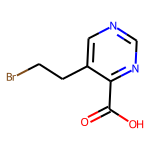

In [99]:
# Sidechain replacement

m1 = Chem.MolFromSmiles('BrCCc1cncnc1C(=O)O')
m1

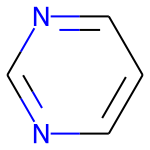

In [101]:
core = Chem.MolFromSmiles('c1cncnc1')
core

[1*]c1cncnc1[2*]


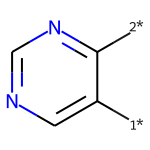

In [103]:

temp = Chem.ReplaceSidechains(m1, core)
print(Chem.MolToSmiles(temp))
temp

[1*]CCBr.[2*]C(=O)O


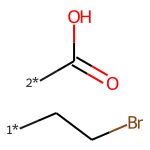

In [105]:
tmp = Chem.ReplaceCore(m1, core)
print(Chem.MolToSmiles(tmp))
tmp

*CCBr.[5*]C(=O)O


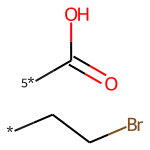

In [106]:
# Atom index 에 따라서 * 를 labeling

tmp = Chem.ReplaceCore(m1, core, labelByIndex=True)
print(Chem.MolToSmiles(tmp))
tmp

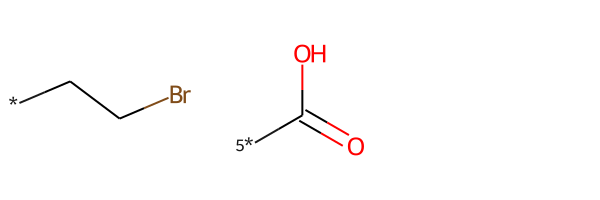

In [107]:
# split two gragments into two independent molecules

rs = Chem.GetMolFrags(tmp, asMols=True)
Draw.MolsToGridImage(rs)

### Scaffold 

In [117]:
# Murcko Decomposition, BM-scaffold 얻기
# branch 된 부분을 자르고 core 에 해당하는 부분만 모아 놓은 것을 BM Scaffold
# from rdkit.Chem.Scaffolds import MurckoScaffold

--2022-08-12 06:05:17--  https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/cdk2.sdf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 160134 (156K) [text/plain]
Saving to: ‘cdk2.sdf.4’

cdk2.sdf.4          100%[===================>] 156.38K  --.-KB/s    in 0.02s   

2022-08-12 06:05:17 (7.28 MB/s) - ‘cdk2.sdf.4’ saved [160134/160134]



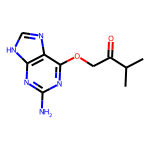

In [115]:
# 최대한 다른 10 개의 다른 구조를 뽑는 방법

!wget https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/cdk2.sdf

suppl = Chem.SDMolSupplier('cdk2.sdf')
ms = [mol for mol in suppl if mol is not None]

AllChem.Compute2DCoords(ms[0])
Chem.Draw.MolToImage(ms[0], size=(150, 150))

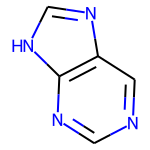

In [116]:
from rdkit.Chem.Scaffolds import MurckoScaffold
core = MurckoScaffold.GetScaffoldForMol(ms[0])
Chem.Draw.MolToImage(core, size=(150, 150))

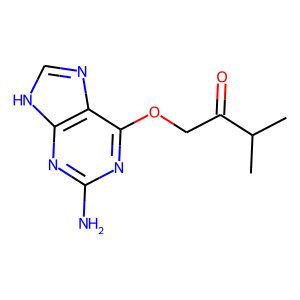

In [114]:
Draw.MolToImage(ms[0])

C1CCC2CCCC2C1


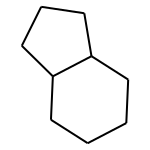

In [122]:
fw = MurckoScaffold.MakeScaffoldGeneric(core) # 좀더 general scaffold # Connectivity 만 남음
print(Chem.MolToSmiles(fw))
Chem.Draw.MolToImage(fw, size=(150, 150))

### MCS

In [ ]:
# Maxium Common Substructure (MCS)
# 여러개의 분자가 모두 가지고 있는 Common 구조를 얻어내는 것을 의미한다.
# Chem 모둘 안에 rdFMCS 모듈을 import


In [123]:
from rdkit.Chem import rdFMCS

mol1 = Chem.MolFromSmiles('O=C(NCc1cc(OC)c(O)cc1)CCC/C=C/C(C)C')
mol2 = Chem.MolFromSmiles('CC(C)CCCCCC(=O)NCC1=CC(=C(C=C1)O)OC')
mol3 = Chem.MolFromSmiles('c1(C=O)cc(OC)c(O)cc1')

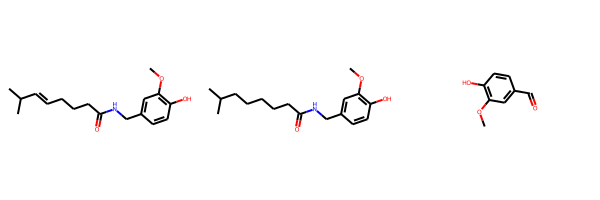

In [124]:
Chem.Draw.MolsToGridImage([mol1, mol2, mol3], molsPerRow=3)

In [125]:
mols = [mol1, mol2, mol3]
res = rdFMCS.FindMCS(mols)
res

In [126]:
print(res.numAtoms)
print(res.numBonds)
print(res.smartsString)

10
10
[#6]1(-[#6]):[#6]:[#6](-[#8]-[#6]):[#6](:[#6]:[#6]:1)-[#8]


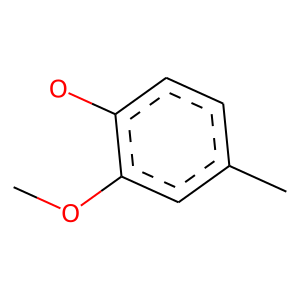

In [127]:
p = Chem.MolFromSmarts(res.smartsString)
Chem.Draw.MolToImage(p)

In [ ]:
# AtomCompare option
# - CompareAny : 원소에 상관 없이 연결상태만 비교
# - CompareElements : 원소를 고려해서 비교
# - CompareIsotope : isotopte을 고려하여 비교

# BondCompare option
# - CompareAny : bond type 을 상관하지 않음
# - CompareOrderExact : 결합차수가 오나전히 같아야함
# - CompareOrder : 단일 결합과 방향족 겷바은 동일하게 취급

In [128]:
# Atom and bond options for MCS

mols = [Chem.MolFromSmiles('NCC'), Chem.MolFromSmiles('OC=C')]
rdFMCS.FindMCS(mols).smartsString

'[#6]'

In [129]:
rdFMCS.FindMCS(mols, atomCompare=rdFMCS.AtomCompare.CompareAny).smartsString

'[#7,#8]-[#6]'

In [130]:
rdFMCS.FindMCS(mols, bondCompare=rdFMCS.BondCompare.CompareAny).smartsString

'[#6]-,=[#6]'

In [131]:
mols = [Chem.MolFromSmiles('c1ccccc1'), Chem.MolFromSmiles('C1CCCC=C1')]

print(rdFMCS.FindMCS(mols, bondCompare=rdFMCS.BondCompare.CompareAny).smartsString)
print(rdFMCS.FindMCS(mols, bondCompare=rdFMCS.BondCompare.CompareOrderExact).smartsString)
print(rdFMCS.FindMCS(mols, bondCompare=rdFMCS.BondCompare.CompareOrder).smartsString)

[#6]1:,-[#6]:,-[#6]:,-[#6]:,-[#6]:,=[#6]:,-1
[#6]
[#6](:,-[#6]:,-[#6]:,-[#6]):,-[#6]:,-[#6]


## Draw

In [68]:
from rdkit.Chem.Draw import rdMolDraw2D

# 특정 구조에 highlight 주기
smi = 'c1cc(F)ccc1Cl'
mol = Chem.MolFromSmiles(smi)
patt = Chem.MolFromSmarts('ClccccF')


# atom
hit_ats_idx = list(mol.GetSubstructMatch(patt))

# bond 를 찾는 법
hit_bonds_idx = []

for bond in patt.GetBonds():
    aid1 = hit_ats_idx[bond.GetBeginAtomIdx()]
    aid2 = hit_ats_idx[bond.GetEndAtomIdx()]
    hit_bonds_idx.append(mol.GetBondBetweenAtoms(aid1, aid2).GetIdx())


d = rdMolDraw2D.MolDraw2DSVG(150, 150) # svg 로 저장하겠다
rdMolDraw2D.PrepareAndDrawMolecule(d, mol, highlightAtoms=hit_ats, highlightBonds=hit_bonds)
d.FinishDrawing()
d

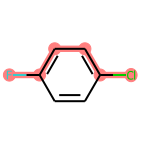

In [69]:
from IPython.display import SVG

SVG(d.GetDrawingText())

In [70]:
d = Chem.Draw.rdMolDraw2D.MolDraw2DCairo(200, 200)
d.DrawMolecule(mol)
d.FinishDrawing()
d.WriteDrawingText('a1.png')

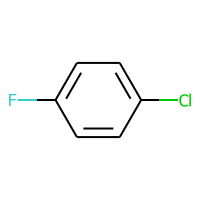

In [71]:
IPython.display.Image(d.GetDrawingText())

### Annotation

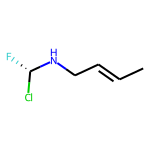

In [54]:
# 원자 결합에 주석을 달기

mol = Chem.MolFromSmiles('Cl[C@H](F)NC\C=C\C')
mol

In [61]:
d = Chem.Draw.rdMolDraw2D.MolDraw2DCairo(200, 200) # png file
mol.GetAtomWithIdx(2).SetProp('atomNote', 'foo')
mol.GetAtomWithIdx(0).SetProp('atomNote', 'bar')
d.drawOptions().addStereoAnnotation = True
d.drawOptions().addAtomIndices = True
d.DrawMolecule(mol)
d.FinishDrawing()
d.WriteDrawingText('b.png')

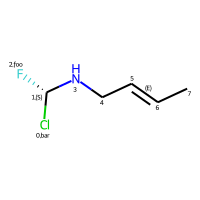

In [65]:
IPython.display.Image(d.GetDrawingText())

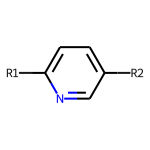

In [62]:
# atom 에 label 하는 방법

smi = 'c1nc(*)ccc1* |$;;;R1;;;;R2$|' # extened smiles grammer
mol = Chem.MolFromSmiles(smi)

mol

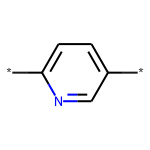

In [63]:
smi = 'c1nc(*)ccc1*' # extened smiles grammer
mol = Chem.MolFromSmiles(smi)
mol

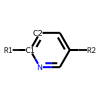

In [64]:
# label method 2

smi = 'c1nc(*)ccc1* |$;;;R1;;;;R2$|' # extened smiles grammer
mol = Chem.MolFromSmiles(smi)

mol.GetAtomWithIdx(2).SetProp('atomLabel', 'C1')
mol.GetAtomWithIdx(4).SetProp('atomLabel', 'C2')

Draw.MolToImage(mol, size=(100, 100))

## ?

In [4]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.ipython_useSVG=True  #< set this to False if you want PNGs instead of SVGs

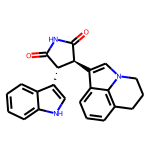

In [6]:
# Test in a kinase inhibitor
mol = Chem.MolFromSmiles("C1CC2=C3C(=CC=C2)C(=CN3C1)[C@H]4[C@@H](C(=O)NC4=O)C5=CNC6=CC=CC=C65")
# Default
mol

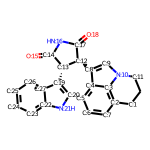

In [7]:
# With atom index

def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol

mol_with_atom_index(mol)

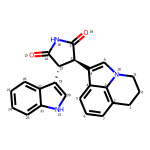

In [8]:
IPythonConsole.drawOptions.addAtomIndices = True

# Test in a kinase inhibitor
mol = Chem.MolFromSmiles("C1CC2=C3C(=CC=C2)C(=CN3C1)[C@H]4[C@@H](C(=O)NC4=O)C5=CNC6=CC=CC=C65")
# Default
mol

In [11]:
## 계산 결과 포함하기
# * 예시: 부분 전하 계산 결과 표시하기
IPythonConsole.drawOptions.addAtomIndices=False

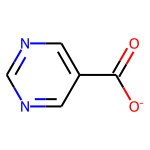

In [14]:
m = Chem.MolFromSmiles('c1ncncc1C(=O)[O-]')
m

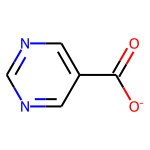

In [16]:
AllChem.ComputeGasteigerCharges(m)
m

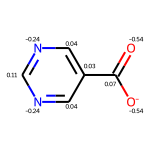

In [17]:
m2 = Chem.Mol(m)
for at in m2.GetAtoms():
    lbl = '%.2f'%(at.GetDoubleProp("_GasteigerCharge"))
    at.SetProp('atomNote',lbl)
m2

In [ ]:
## Stereochemistry 표시하기

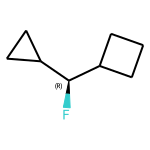

In [18]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

IPythonConsole.drawOptions.addStereoAnnotation = True

# Default Representation uses legacy FindMolChiralCenters() code
m1 = Chem.MolFromSmiles('C1CC1[C@H](F)C1CCC1')
m1

In [ ]:
## 흑백으로 분자 표시하기 
# * Drawoption을 이용해서 다양한 표현할 수 있다. 
# * 모든 option에 관한 내용은 아래 reference에서 확인할 수 있다. 
# *https://www.rdkit.org/docs/source/rdkit.Chem.Draw.rdMolDraw2D.html#rdkit.Chem.Draw.rdMolDraw2D.MolDrawOptions

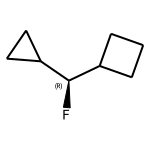

In [19]:
IPythonConsole.drawOptions.useBWAtomPalette()
m1

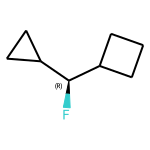

In [20]:
IPythonConsole.drawOptions.useDefaultAtomPalette()
m1

((3, 4, 5), (8, 9, 7))


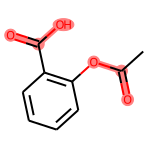

In [21]:
## 특정 구조에 하이라이트 주기
m = Chem.MolFromSmiles('c1cc(C(=O)O)c(OC(=O)C)cc1')
substructure = Chem.MolFromSmarts('C(=O)O')
print(m.GetSubstructMatches(substructure))
m

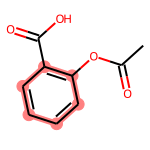

In [22]:
# you can also manually set the atoms that should be highlighted:
m.__sssAtoms = [0,1,2,6,11,12]
m

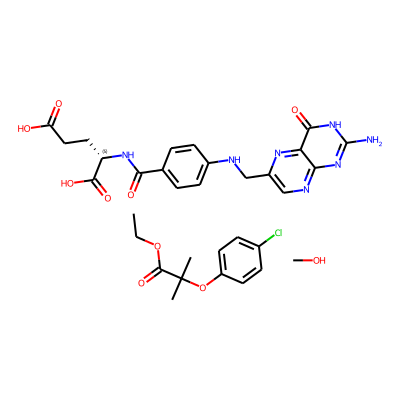

In [23]:
from rdkit import Chem
from rdkit.Chem import rdmolops
IPythonConsole.molSize = 400,400
mol = Chem.MolFromSmiles('CCOC(=O)C(C)(C)OC1=CC=C(C=C1)Cl.CO.C1=CC(=CC=C1C(=O)N[C@@H](CCC(=O)O)C(=O)O)NCC2=CN=C3C(=N2)C(=O)NC(=N3)N')
mol

In [24]:
mol_frags = rdmolops.GetMolFrags(mol, asMols = True)
largest_mol = max(mol_frags, default=mol, key=lambda m: m.GetNumAtoms())
print(Chem.MolToSmiles(largest_mol))

Nc1nc2ncc(CNc3ccc(C(=O)N[C@@H](CCC(=O)O)C(=O)O)cc3)nc2c(=O)[nH]1


In [25]:
# create a mol object
mol = Chem.MolFromSmiles('CC(N)C1CC1')

# Generate 100 random SMILES
smis = []
for i in range(100):
    smis.append(Chem.MolToSmiles(mol,doRandom=True,canonical=False))

In [26]:
# remove duplicates
smis_set = list(set(smis))
smis_set

['C(C1CC1)(N)C',
 'C(N)(C)C1CC1',
 'C(N)(C1CC1)C',
 'C(C)(N)C1CC1',
 'NC(C1CC1)C',
 'C1C(C1)C(C)N',
 'C1(CC1)C(N)C',
 'C(C1CC1)(C)N',
 'NC(C)C1CC1',
 'CC(C1CC1)N',
 'C1(C(C)N)CC1',
 'C1C(C(N)C)C1',
 'C1C(C1)C(N)C',
 'CC(N)C1CC1',
 'C1CC1C(N)C',
 'C1(CC1)C(C)N',
 'C1CC1C(C)N',
 'C(C)(C1CC1)N',
 'C1C(C(C)N)C1',
 'C1(C(N)C)CC1']